In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
from sklearn.datasets import load_boston
boston = load_boston() #Dictionary with 'data', 'feature_name', 'target'
boston.keys()
boston_df = pd.DataFrame(data = boston['data'], columns =boston['feature_names']) #convert dictionary to dataframe

In [108]:
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [30]:
boston_df.head()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [31]:
boston_df['target'] = boston['target'] 

In [58]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Train Test Split

In [34]:
X = boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT',]]
y = boston_df['target']

In [35]:
from sklearn.cross_validation import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lm = LinearRegression()

In [90]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
lm.intercept_ #intercept

40.61462894265982

In [92]:
lm.coef_ #Returns the coefficients of each variable in the regression model

array([ -9.36828430e-02,   5.08598697e-02,  -9.53415984e-02,
         1.81199495e+00,  -1.56204705e+01,   3.23149298e+00,
        -1.18624648e-02,  -1.65724507e+00,   3.45201364e-01,
        -1.31583974e-02,  -9.21156266e-01,   9.87351584e-03,
        -4.97938067e-01])

In [93]:
lm.score(X_train, y_train)  #Returns R-squared

0.73419216519849717

In [105]:
cdf = pd.DataFrame(lm.coef_*100, X_train.columns, columns=['Coefficient %'])
cdf

,Coefficient %
CRIM,-9.368284
ZN,5.085987
INDUS,-9.534160
CHAS,181.199495
NOX,-1562.047047
RM,323.149298
AGE,-1.186246
DIS,-165.724507
RAD,34.520136
TAX,-1.315840


# Predictions

In [95]:
predictions = lm.predict(X_test)

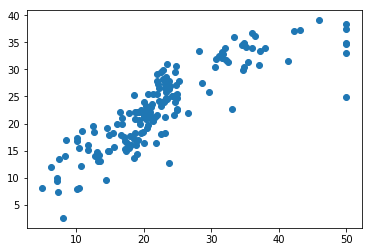

In [96]:
plt.scatter(y_test,predictions,marker='o')

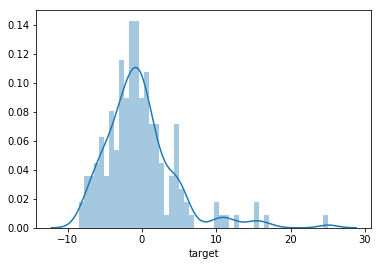

In [97]:
sns.distplot((y_test-predictions), bins=50)

# Evaluation

In [98]:
from sklearn import metrics

In [99]:
metrics.mean_absolute_error(y_test,predictions)  #MAE

3.4220438239773956

In [100]:
metrics.mean_squared_error(y_test,predictions)  #MSE

23.538035871155426

In [101]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))  #RMSE

4.8516013718313076

In [109]:
print(y_test.mean()," & ",predictions.mean())

22.855688622754478  &  23.0783480468


In [110]:
print(y_test.std()," & ",predictions.std())

9.438511246645977  &  7.38682407854
